In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [22]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
    mean=None,         # Centro en el origen (0,0)
    cov=0.1,           # Covarianza baja → puntos más agrupados
    n_samples=1000,    # Número total de muestras
    n_features=2,      # Dos características → coordenadas X e Y
    n_classes=2,       # Clasificación binaria
    shuffle=True,      # Mezcla aleatoriamente los puntos
    random_state=None  # Sin semilla → resultados aleatorios cada vez
)


X, Y = gaussian_quantiles

In [23]:
X

array([[-0.09824326,  0.01169524],
       [ 0.12245478,  0.08996659],
       [ 0.15268767, -0.05027937],
       ...,
       [-0.10640705,  0.03601129],
       [ 0.52422968, -0.44075459],
       [ 0.10870805,  0.18949484]])

In [24]:
Y = Y[:, np.newaxis]

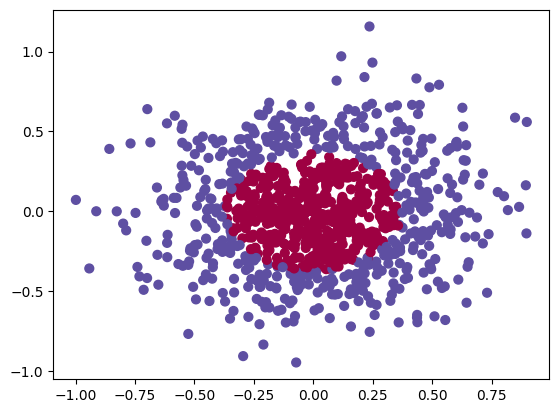

In [25]:
plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.Spectral)

# Funciones de activacion

In [26]:
# Creacion de funciones de activacion

def sigmoid(a, derivate=False):
  if derivate:
    return np.exp(-a)/((1+np.exp(-a))**2)
  else:
    return 1/(1+np.exp(-a))

def ReLu(a, derivate=False):
  if derivate:
    return np.where(a>0, 1, 0)
  else:
    return np.maximum(0,a)

# Funcion de perdida

In [27]:
def MSE(y_hat, y, derivate = False):
  if derivate:
      return 2*(y_hat - y)
  return np.mean((y_hat - y)**2)

# Creacion de vamores para pesos Wx y sesgo Bx (valores iniciales)

In [28]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L-1):
    parameters['W'+str(l+1)] = (np.random.randn(layers_dim[l], layers_dim[l+1])*2)-1
    parameters['b'+str(l+1)] = (np.random.randn(1, layers_dim[l+1])*2)-1
  return parameters

In [29]:
layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)

In [30]:
params

{'W1': array([[-3.05368171, -1.39107979, -0.76989995, -2.88334099],
        [ 2.04159841,  1.5563426 , -2.17213508, -5.10857682]]),
 'b1': array([[-5.98756667,  0.23131375, -2.97280972, -1.41468977]]),
 'W2': array([[ 0.9522291 , -3.67519079, -0.51440845,  1.65188324, -2.49913428,
         -4.29785789, -1.52723364, -1.02436953],
        [-2.15406554, -0.3002177 , -3.44182498, -2.31692356,  0.20100211,
         -6.5812281 , -0.27168206, -0.20372423],
        [-2.76191958, -1.2515579 , -2.47678767, -2.44635246,  4.91413963,
          0.38425562, -3.87919649,  0.49413182],
        [-3.51144159, -4.252599  ,  0.01000432,  1.14490039,  2.27024139,
         -0.20422009, -2.93886284, -1.27838307]]),
 'b2': array([[-2.61908862, -2.52391755,  0.21904476,  1.38094004, -2.34581467,
         -1.72640702, -1.4753104 ,  0.62775274]]),
 'W3': array([[-0.97830747],
        [-1.4769573 ],
        [-0.97537737],
        [ 0.14634812],
        [-1.75657476],
        [-0.37276627],
        [-3.00952248],


# Entrenamiento forward

In [31]:

def train(X_data, Lr, params, training=True):
  params['A0'] = X_data # Datos de entrenamiento con la forma [1000, 2]

  ## %% FORWART SECTION %%
  # esta operacion representa la operacion de producto punto entre los valores de entrada de la forma [1000, 2]
  # y los pesos de la forma [2, 4] y la suma del sesgo o bias

  # Zn va a tener los valores de la operacion lineal entre los pesos y el sesgo o bias
  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  # An va a tener el resiltado de la operacion evaluada en la funcion de activacion
  params['A1'] = ReLu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = ReLu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  if(training):

    ## %% BACKPROPAGATION %%

    params['dZ3'] = MSE(params['A3'], Y, derivate=True) * sigmoid(params['A3'], derivate=True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * ReLu(params['A2'], derivate=True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * ReLu(params['A1'], derivate=True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ3'])

    ## %% GRADIENT DECENT %%

    params['W1'] -= Lr * params['dW1']
    params['b1'] -= Lr * np.mean(params['dW1'], axis=0, keepdims=True)

    params['W2'] -= Lr * params['dW2']
    params['b2'] -= Lr * np.mean(params['dW2'], axis=0, keepdims=True)

    params['W3'] -= Lr * params['dW3']
    params['b3'] -= Lr * np.mean(params['dW3'], axis=0, keepdims=True)

  return params['A3']

In [75]:
## Ejecucion de prueba de entrenamiento

layer_dims = [2,4,8,1]
params = initialize_parameters_deep(layer_dims)
errors = []

for _ in range(60000):
  output = train(X, 0.0001, params)
  errors.append(MSE(output, Y))

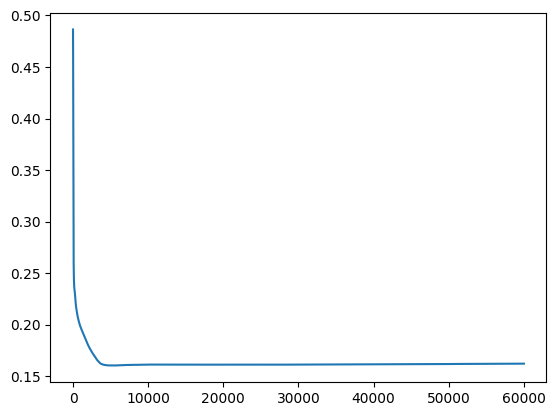

In [76]:
plt.plot(errors)

In [81]:
## Test para evaluar las preducciones de la red neuronal

data_test = (np.random.rand(1000, 2)*2)-1
Yt = train(data_test, 0.0001, params, training=False)

In [82]:
Yt = np.where(Yt>0.5, 1, 0)

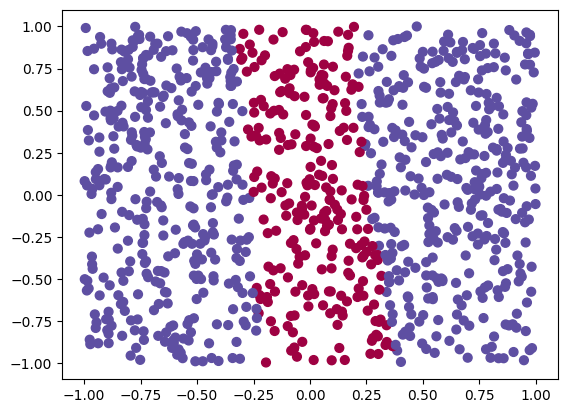

In [83]:
plt.scatter(data_test[:,0], data_test[:,1], c=Yt, s=40, cmap=plt.cm.Spectral)